In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

In [2]:
def Cargar_Archivos_Laurdan(archivo):
    # Nombre del archivo a cargar
    nombre_archivo = archivo
    
    # Lista de nombres de columnas
    columnas = [
        "Temperature",
        "Sample",
        "Iteration",
        "Ratio",
        "GPolarization",
        "I1",
        "I2",
        "RatioStdError",
        "GPolarizationStdError",
        "I1StdError",
        "I2StdError",
        "RealTime",
        "RealTemperature"
    ]
    
    # Cargar el archivo CSV
    LAURDAN = pd.read_csv(nombre_archivo, delimiter='\t', names=columnas, skiprows=2, decimal=',')
    
    # Devolver el DataFrame cargado
    return LAURDAN

In [3]:
LAURDAN = Cargar_Archivos_Laurdan('LaurdanT.csv')
LAURDAN
LAURDAN7 = Cargar_Archivos_Laurdan('Laurdan T STX.csv')
LAURDAN7
LAURDAN15= Cargar_Archivos_Laurdan('Laurdan T 15STX.csv')
LAURDAN15
LAURDAN22= Cargar_Archivos_Laurdan('Laurdan T 22STX.csv')
LAURDAN22


,Temperature,Sample,Iteration,Ratio,GPolarization,I1,I2,RatioStdError,GPolarizationStdError,I1StdError,I2StdError,RealTime,RealTemperature
0,10.00,Reference,1,3.8998560,0.59182474,262223.20,67239.200,0.020917638,0.0036746250,1011.2619,250.65603,375.90785,9.9866000
1,10.00,Blank,1,3.9225234,0.59370432,279955.20,71371.200,0.026955912,0.0057456753,1721.9028,218.76421,381.15039,9.9800000
2,10.00,Sample2,1,3.9326726,0.59454029,238411.20,60623.200,0.024223256,0.0036321665,884.75483,298.02610,386.45451,9.9800000
3,11.00,Sample,1,3.9703272,0.59761200,266215.20,67051.200,0.030864547,0.0035256929,892.24710,470.30959,599.68297,10.990000
4,11.00,Reference,1,3.9494766,0.59591687,265907.20,67327.200,0.025939254,0.0029774468,753.19055,398.95196,604.96550,10.993300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,44.00,Sample2,1,1.0178229,0.0088327493,139799.20,137351.20,0.0053177407,0.0026196439,590.98562,421.68972,8146.6493,44.003300
139,45.00,Sample,1,0.98501524,-0.0075489406,155659.20,158027.20,0.0044580689,-0.0022739988,298.42848,647.87379,8345.0921,45.000000
140,45.00,Reference,1,0.98314455,-0.0084993558,154219.20,156863.20,0.0045864312,-0.0023417955,373.94236,625.16273,8350.3768,44.990000
141,45.00,Blank,1,0.98054185,-0.0098246601,163271.20,166511.20,0.0075875114,-0.0038503052,1094.6699,643.30397,8355.4656,45.003300


In [4]:
def calcular_promedio_y_desviacion(df):
    temperatures = df['Temperature'].unique()
    data_promedio = []
    data_des = []
    df['GPolarization'] = pd.to_numeric(df['GPolarization'], errors='coerce')

    for temp in temperatures:
        temp_data = df[df['Temperature'] == temp]['GPolarization']
        temp_promedios = [temp_data[i:i+4].mean() for i in range(0, len(temp_data), 4)]
        temp_des = [temp_data[i:i+4].std() for i in range(0, len(temp_data), 4)]  # No necesitas dividir por 2 aquí
        data_promedio.extend(temp_promedios)
        data_des.extend(temp_des)

    temperatures_promedio = sorted(set(df['Temperature']))

    return data_promedio, data_des, temperatures_promedio

In [5]:
Promedio_Laurdan, Desviacion_Laurdan,temperatures_promedio = calcular_promedio_y_desviacion(LAURDAN)
Promedio_Laurdan7, Desviacion_Laurdan7,temperatures_promedio = calcular_promedio_y_desviacion(LAURDAN7)
Promedio_Laurdan15, Desviacion_Laurdan15,temperatures_promedio = calcular_promedio_y_desviacion(LAURDAN15)
Promedio_Laurdan22, Desviacion_Laurdan22,temperatures_promedio = calcular_promedio_y_desviacion(LAURDAN22)


In [8]:
def graficar_promedio_y_desviacion(T_P, D_P, DES, D_P7, DES_7,D_P15, DES_15, D_P22, DES_22):
    plt.figure(figsize=(10, 6))  
    
    plt.errorbar(T_P, D_P, yerr=DES, fmt='o', capsize=5, color= 'blue')
    plt.errorbar(T_P, D_P7, yerr=DES_7, fmt='o', capsize=5, color='orange')
    plt.errorbar(T_P, D_P15, yerr=DES_15, fmt='o', capsize=5, color ='green')
    plt.errorbar(T_P, D_P22, yerr=DES_22, fmt='o', capsize=5, color= 'red')
        
    plt.plot(T_P, D_P, marker='o', label='INICIAL', color= 'blue')
    plt.plot(T_P, D_P7, marker='o', label='STX (7,5%)',color= 'orange')
    plt.plot(T_P, D_P15, marker='o', label='STX (15%)',color= 'green')
    plt.plot(T_P, D_P22, marker='o', label='STX (22,5%)',color= 'red')

    
    
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Anisotropía de fluorescencia')
    plt.title('DMPC- DMPG LAURDAN')
    plt.xticks(range(0, 45, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()

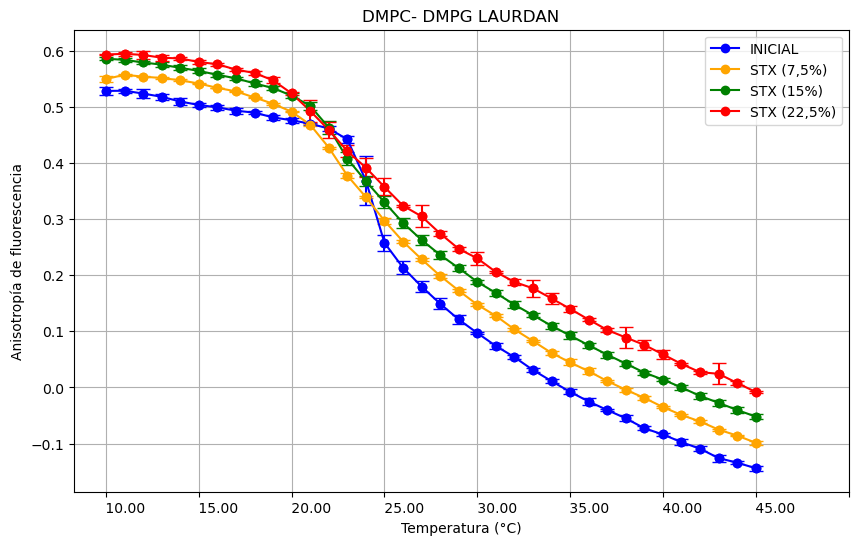

In [9]:
graficar_promedio_y_desviacion(temperatures_promedio,Promedio_Laurdan, Desviacion_Laurdan, Promedio_Laurdan7, Desviacion_Laurdan7, Promedio_Laurdan15, Desviacion_Laurdan15, Promedio_Laurdan22, Desviacion_Laurdan22)

In [10]:
def graficar_derivadas(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x,y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-1):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_Laurdan)
    der_p = derivada(T, Promedio_Laurdan7)
    der_p15 = derivada(T, Promedio_Laurdan15)
    der_p22 = derivada(T, Promedio_Laurdan22)

    
    plt.plot(T[:-1], der_promedio, label='INICIAL')
    plt.plot(T[:-1], der_p, label='STX(7,5%)')
    plt.plot(T[:-1], der_p15, label='STX(15%)')
    plt.plot(T[:-1], der_p22, label='STX(22,5%)')


    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Derivada de Anisotropía')
    plt.title('DMPC- DMPG LAURDAN')
    plt.xticks(range(10, 45, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()
    

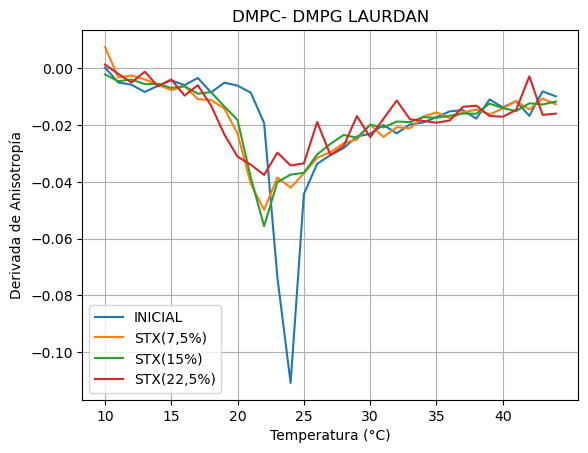

In [11]:
graficar_derivadas(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22)

In [12]:
X = np.array(temperatures_promedio, dtype=np.float64) 
Y = np.array(Promedio_Laurdan, dtype=np.float64)


In [13]:
def encontrar_temperatura_minima(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x, y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-1):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_Laurdan)
    der_p = derivada(T, Promedio_Laurdan7)
    der_p15 = derivada(T, Promedio_Laurdan15)
    der_p22 = derivada(T, Promedio_Laurdan22)

    
    T_min = np.argmin(der_promedio)
    T_min = T[T_min]

    T_min7l = np.argmin(der_p)
    T_min7l = T[T_min7l]
    
    T_min15l = np.argmin(der_p15)
    T_min15l = T[T_min15l]
    
    T_min22l = np.argmin(der_p22)
    T_min22l = T[T_min22l]

    return T_min, T_min7l, T_min15l, T_min22l

In [14]:
T_min, T_min7l, T_min15l,T_min22l  = encontrar_temperatura_minima(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22)

In [15]:
T_min, T_min7l, T_min15l, T_min22l

(24.0, 22.0, 22.0, 22.0)

In [16]:
def Cargar_Archivos_DPH(archivo):
    # Nombre del archivo a cargar
    nombre_archivo = archivo
    
    # Lista de nombres de columnas
    columnas = [
    "Temperature",
    "Sample",
    "Iteration",
    "GPolarization",
    "Anisotropy",
    "TotalIntensity",
    "I_VV",
    "I_VH",
    "I_HV",
    "I_HH",
    "GFactor",
    "PolarizationStdError",
    "AnisotropyStdError",
    "TotalIntensityStdError",
    "I_VVStdError",
    "I_VHStdError",
    "I_HVStdError",
    "I_HHStdError",
    "GFactorStdError",
    "RealTime",
    "RealTemperature"]
    
    # Cargar el archivo CSV
    DPH = pd.read_csv(nombre_archivo, delimiter='\t', names=columnas, skiprows=2, decimal=',')
    
    # Devolver el DataFrame cargado
    return DPH

In [17]:
DPH = Cargar_Archivos_DPH('DPH.csv')
DPH
DPH7 = Cargar_Archivos_DPH('DPH 7STX.csv')
DPH7
DPH15 = Cargar_Archivos_DPH('DPH 15STX.csv')
DPH15
DPH22 = Cargar_Archivos_DPH('DPH 22STX.csv')
DPH22

,Temperature,Sample,Iteration,GPolarization,Anisotropy,TotalIntensity,I_VV,I_VH,I_HV,I_HH,...,PolarizationStdError,AnisotropyStdError,TotalIntensityStdError,I_VVStdError,I_VHStdError,I_HVStdError,I_HHStdError,GFactorStdError,RealTime,RealTemperature
0,10.00,Reference,1,0.36380503,0.27600768,44837.185,23196.000,16342.400,14012.000,21162.400,...,0.0075933874,0.0059895468,416.26778,144.22821,178.70646,154.74136,193.99427,0.0095029757,5002.9931,9.9000000
1,10.00,Blank,1,0.37510814,0.28580845,45018.604,23584.000,16186.400,14012.000,21162.400,...,0.0072496344,0.0057357762,390.64749,146.32688,144.37605,154.74136,193.99427,0.0095029757,5005.5938,9.9166000
2,10.00,Sample2,1,0.32875935,0.24614731,45232.355,22500.000,17166.400,14012.000,21162.400,...,0.0071754372,0.0055712766,410.57703,121.91801,164.16794,154.74136,193.99427,0.0095029757,5008.2158,9.9200000
3,11.00,Sample,1,0.37853731,0.28879855,47107.085,24772.000,16866.400,14012.000,21162.400,...,0.0054550136,0.0044349832,346.75626,68.883154,85.218673,154.74136,193.99427,0.0095029757,5128.7328,11.000000
4,11.00,Reference,1,0.37623167,0.28678727,46060.735,24160.000,16538.400,14012.000,21162.400,...,0.0088056052,0.0068373582,433.42595,221.41364,151.09085,154.74136,193.99427,0.0095029757,5131.1911,10.996600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,44.00,Sample2,1,0.14574983,0.10212828,49295.144,19788.000,22282.400,14012.000,21162.400,...,0.0091420804,0.0064373119,541.05050,180.59162,214.61697,154.74136,193.99427,0.0095029757,9215.3306,44.010000
139,45.00,Sample,1,0.13885410,0.097061880,51060.034,20324.000,23210.400,14012.000,21162.400,...,0.0074349546,0.0052326576,493.73299,104.21346,147.80768,154.74136,193.99427,0.0095029757,9321.0045,45.010000
140,45.00,Reference,1,0.13534540,0.094493343,51371.475,20360.000,23418.400,14012.000,21162.400,...,0.0080126649,0.0056297738,533.41801,115.28515,204.22645,154.74136,193.99427,0.0095029757,9323.6139,45.010000
141,45.00,Blank,1,0.12855267,0.089538591,52016.951,20444.000,23842.400,14012.000,21162.400,...,0.0091013374,0.0063552238,537.72089,215.03075,146.35725,154.74136,193.99427,0.0095029757,9326.2377,45.010000


In [18]:
Promedio_DPH, Desviacion_DPH,temperatures_promedio = calcular_promedio_y_desviacion(DPH)
Promedio_DPH7, Desviacion_DPH7,temperatures_promedio = calcular_promedio_y_desviacion(DPH7)
Promedio_DPH15, Desviacion_DPH15,temperatures_promedio = calcular_promedio_y_desviacion(DPH15)
Promedio_DPH22, Desviacion_DPH22,temperatures_promedio = calcular_promedio_y_desviacion(DPH22)

In [19]:
def graficar_promedio_y_desviacion_DPH(T_P, D_P, DES, D_P7, DES_7,D_P15, DES_15, D_P22, DES_22):
    plt.figure(figsize=(10, 6))  
    
    plt.errorbar(T_P, D_P, yerr=DES, fmt='o', capsize=5, color='blue')
    plt.errorbar(T_P, D_P7, yerr=DES_7, fmt='o', capsize=5, color='orange')
    plt.errorbar(T_P, D_P15, yerr=DES_15, fmt='o', capsize=5, color='green')
    plt.errorbar(T_P, D_P22, yerr=DES_22, fmt='o', capsize=5, color='red')
        
    plt.plot(T_P, D_P, marker='o', label='INICIAL', color='blue')
    plt.plot(T_P, D_P7, marker='o', label='STX (7,5%)', color= 'orange')
    plt.plot(T_P, D_P15, marker='o', label='STX (15%)', color='green')
    plt.plot(T_P, D_P22, marker='o', label='STX (22,5%)',color = 'red')

    
    
    plt.xlabel('Temperatura')
    plt.ylabel('Anisotropía de fluorescencia')
    plt.title('DMPC- DMPG DPH')
    plt.xticks(range(0, 45, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()

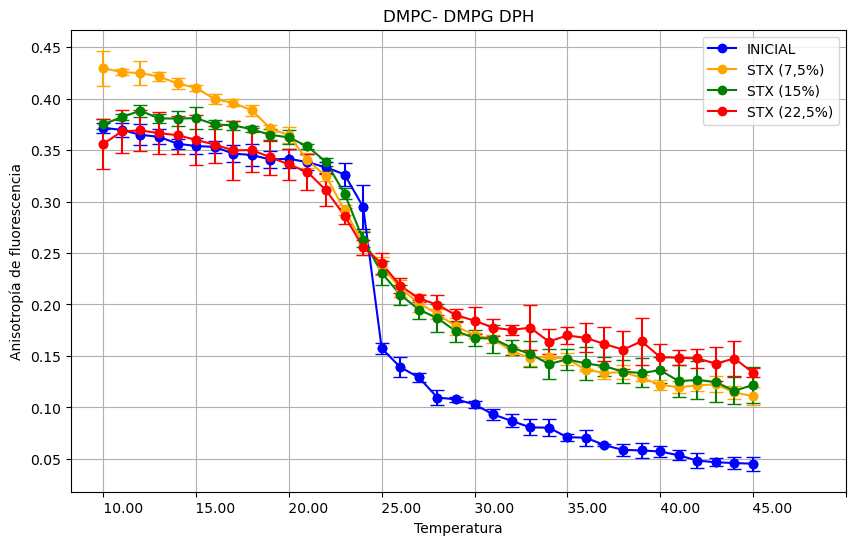

In [20]:
graficar_promedio_y_desviacion_DPH(temperatures_promedio,Promedio_DPH, Desviacion_DPH, Promedio_DPH7, Desviacion_DPH7,Promedio_DPH15, Desviacion_DPH15,Promedio_DPH22, Desviacion_DPH22)

In [22]:
def graficar_derivadas(temperatures_promedio, Promedio_DPH, Promedio_DPH7, Promedio_DPH15,Promedio_DPH22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x,y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-1):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_DPH)
    der_p = derivada(T, Promedio_DPH7)
    der_p15 = derivada(T, Promedio_DPH15)
    der_p22 = derivada(T, Promedio_DPH22)

    
    plt.plot(T[:-1], der_promedio, label='INICIAL')
    plt.plot(T[:-1], der_p, label='STX(7,5%)')
    plt.plot(T[:-1], der_p15, label='STX(15%)')
    plt.plot(T[:-1], der_p22, label='STX(22,5%)')


    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Derivada de Anisotropía')
    plt.title('DMPC- DMPG DPH')
    plt.xticks(range(10, 45, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()

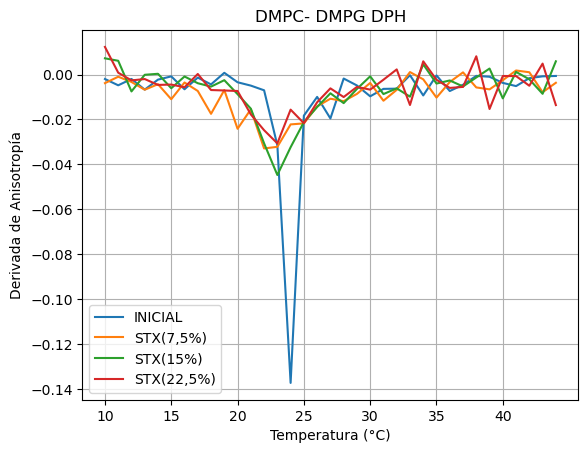

In [23]:
graficar_derivadas(temperatures_promedio, Promedio_DPH, Promedio_DPH7,Promedio_DPH15,Promedio_DPH22)

In [24]:
T_min, T_min7l, T_m15, T_m22 = encontrar_temperatura_minima(temperatures_promedio, Promedio_DPH, Promedio_DPH7,Promedio_DPH15,Promedio_DPH22 )

In [25]:
T_min, T_min7l,T_m15, T_m22

(24.0, 22.0, 23.0, 23.0)

## Datos para colesterol

In [26]:
def Cargar_Archivos_Laurdan(archivo):
    # Nombre del archivo a cargar
    nombre_archivo = archivo
    
    # Lista de nombres de columnas
    columnas = [
        "Temperature",
        "Sample",
        "Iteration",
        "Ratio",
        "GPolarization",
        "I1",
        "I2",
        "RatioStdError",
        "GPolarizationStdError",
        "I1StdError",
        "I2StdError",
        "RealTime",
        "RealTemperature"
    ]
    
    # Cargar el archivo CSV
    LAURDAN = pd.read_csv(nombre_archivo, delimiter='\t', names=columnas, skiprows=2, decimal=',')
    
    # Devolver el DataFrame cargado
    return LAURDAN

In [27]:
LAUC = Cargar_Archivos_Laurdan('LaurdanT.csv')
LAUC
LAUC7 = Cargar_Archivos_Laurdan('Lauc 7.csv')
LAUC7
LAUC15= Cargar_Archivos_Laurdan('Lauc 15.csv')
LAUC15
LAUC22= Cargar_Archivos_Laurdan('Lauc 22.csv')
LAUC22

,Temperature,Sample,Iteration,Ratio,GPolarization,I1,I2,RatioStdError,GPolarizationStdError,I1StdError,I2StdError,RealTime,RealTemperature
0,10.00,Reference,1,4.4335656,0.63191757,282560.00,63732.000,0.034098112,0.0048987367,1383.3422,378.02058,377.17281,9.9100000
1,10.00,Blank,1,4.3060835,0.62307416,261896.00,60820.000,0.020133165,0.0026609974,689.94557,234.92788,382.46085,9.9300000
2,10.00,Sample2,1,4.3974592,0.62945528,251992.00,57304.000,0.023973064,0.0035672485,903.61841,235.30217,387.61686,9.9400000
3,11.00,Sample,1,4.4633944,0.63392722,279712.00,62668.000,0.033930042,0.0037407716,996.50590,420.83726,509.74199,11.000000
4,11.00,Reference,1,4.4951376,0.63604187,282888.00,62932.000,0.026387033,0.0041525494,1183.6786,259.09586,514.95625,10.996600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,44.00,Sample2,1,1.5874555,0.22703985,155196.00,97764.000,0.010598467,0.0032296724,588.22369,537.33333,4978.9128,44.003300
139,45.00,Sample,1,1.5308919,0.20976474,172060.00,112392.00,0.010476345,0.0035562991,823.33198,549.83796,5087.0078,45.010000
140,45.00,Reference,1,1.5089987,0.20286926,169032.00,112016.00,0.0097220631,0.0031241657,625.80934,590.62904,5092.0818,45.006600
141,45.00,Blank,1,1.5065627,0.20209455,129016.00,85636.000,0.0069169230,0.0024513760,446.30632,258.50510,5097.4317,45.010000


In [28]:
Promedio_Lauc, Desviacion_Lauc,temperatures_promedio = calcular_promedio_y_desviacion(LAUC)
Promedio_Lauc7, Desviacion_Lauc7,temperatures_promedio = calcular_promedio_y_desviacion(LAUC7)
Promedio_Lauc15, Desviacion_Lauc15,temperatures_promedio = calcular_promedio_y_desviacion(LAUC15)
Promedio_Lauc22, Desviacion_Lauc22,temperatures_promedio = calcular_promedio_y_desviacion(LAUC22)

In [31]:
def graficar_promedio_y_desviacion(T_P, D_P, DES, D_P7, DES_7,D_P15, DES_15, D_P22, DES_22):
    plt.figure(figsize=(10, 6))  
    
    plt.errorbar(T_P, D_P, yerr=DES, fmt='o', capsize=5, color= 'blue')
    plt.errorbar(T_P, D_P7, yerr=DES_7, fmt='o', capsize=5, color='orange')
    plt.errorbar(T_P, D_P15, yerr=DES_15, fmt='o', capsize=5, color ='green')
    plt.errorbar(T_P, D_P22, yerr=DES_22, fmt='o', capsize=5, color= 'red')
        
    plt.plot(T_P, D_P, marker='o', label='INICIAL', color= 'blue')
    plt.plot(T_P, D_P7, marker='o', label='Colesterol (7,5%)',color= 'orange')
    plt.plot(T_P, D_P15, marker='o', label='Colesterol (15%)',color= 'green')
    plt.plot(T_P, D_P22, marker='o', label='Colesterol (22,5%)',color= 'red')

    
    
    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Anisotropía de fluorescencia')
    plt.title('DMPC- DMPG LAURDAN')
    plt.xticks(range(0, 45, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()

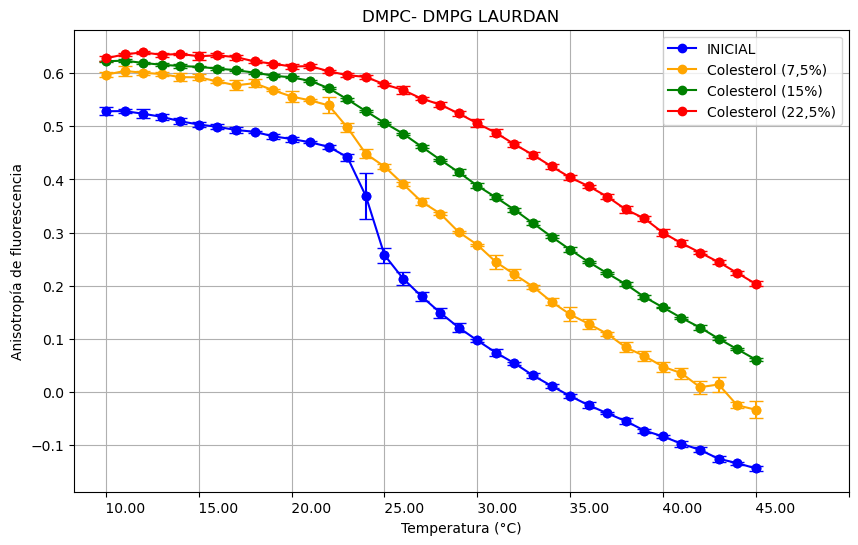

In [32]:
graficar_promedio_y_desviacion(temperatures_promedio,Promedio_Lauc, Desviacion_Lauc, Promedio_Lauc7, Desviacion_Lauc7, Promedio_Lauc15, Desviacion_Lauc15, Promedio_Lauc22, Desviacion_Lauc22)

In [34]:
def graficar_derivadas(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x,y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-1):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_Laurdan)
    der_p = derivada(T, Promedio_Laurdan7)
    der_p15 = derivada(T, Promedio_Laurdan15)
    der_p22 = derivada(T, Promedio_Laurdan22)

    
    plt.plot(T[:-1], der_promedio, label='INICIAL')
    plt.plot(T[:-1], der_p, label='Colesterol(7,5%)')
    plt.plot(T[:-1], der_p15, label='Colesterol(15%)')
    plt.plot(T[:-1], der_p22, label='Colesterol(22,5%)')


    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Derivada de Anisotropía')
    plt.title('DMPC- DMPG LAURDAN')
    plt.xticks(range(10, 45, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()
    

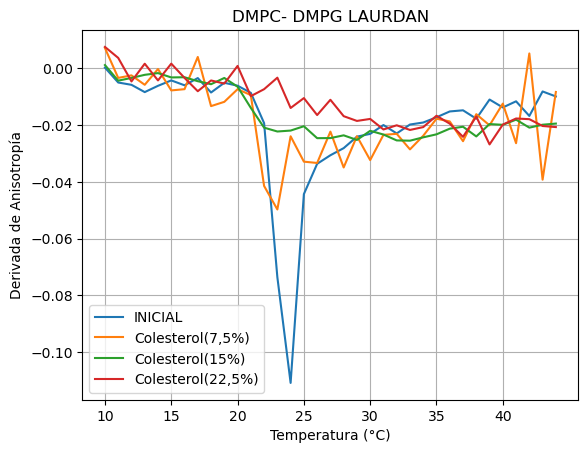

In [35]:
graficar_derivadas(temperatures_promedio, Promedio_Lauc, Promedio_Lauc7,Promedio_Lauc15,Promedio_Lauc22)

In [54]:
def encontrar_temperatura_minimac(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x, y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-22):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_Laurdan)
    der_p = derivada(T, Promedio_Laurdan7)
    der_p15 = derivada(T, Promedio_Laurdan15)
    der_p22 = derivada(T, Promedio_Laurdan22)

    
    T_min = np.argmin(der_promedio)
    T_min = T[T_min]

    T_min7l = np.argmin(der_p)
    T_min7l = T[T_min7l]
    
    T_min15l = np.argmin(der_p15)
    T_min15l = T[T_min15l]
    
    T_min22l = np.argmin(der_p22)
    T_min22l = T[T_min22l]

    return T_min, T_min7l, T_min15l, T_min22l

In [55]:
T_min, T_min7l, T_m15, T_m22 = encontrar_temperatura_minimac(temperatures_promedio, Promedio_Lauc, Promedio_Lauc7,Promedio_Lauc15,Promedio_Lauc22)

In [56]:
T_min, T_min7l, T_m15, T_m22

(23.0, 23.0, 23.0, 21.0)

In [39]:
def Cargar_Archivos_DPH(archivo):
    # Nombre del archivo a cargar
    nombre_archivo = archivo
    
    # Lista de nombres de columnas
    columnas = [
    "Temperature",
    "Sample",
    "Iteration",
    "GPolarization",
    "Anisotropy",
    "TotalIntensity",
    "I_VV",
    "I_VH",
    "I_HV",
    "I_HH",
    "GFactor",
    "PolarizationStdError",
    "AnisotropyStdError",
    "TotalIntensityStdError",
    "I_VVStdError",
    "I_VHStdError",
    "I_HVStdError",
    "I_HHStdError",
    "GFactorStdError",
    "RealTime",
    "RealTemperature"]
    
    # Cargar el archivo CSV
    DPH = pd.read_csv(nombre_archivo, delimiter='\t', names=columnas, skiprows=2, decimal=',')
    
    # Devolver el DataFrame cargado
    return DPH

In [40]:
DPHc = Cargar_Archivos_DPH('DPH.csv')
DPHc
DPHc7 = Cargar_Archivos_DPH('DPHc 7.csv')
DPHc7
DPHc15 = Cargar_Archivos_DPH('DPHc 15.csv')
DPHc15
DPHc22 = Cargar_Archivos_DPH('DPHc 22.csv')
DPHc22

,Temperature,Sample,Iteration,GPolarization,Anisotropy,TotalIntensity,I_VV,I_VH,I_HV,I_HH,...,PolarizationStdError,AnisotropyStdError,TotalIntensityStdError,I_VVStdError,I_VHStdError,I_HVStdError,I_HHStdError,GFactorStdError,RealTime,RealTemperature
0,10.00,Blank,1,0.36549787,0.27747016,198278.48,102770.40,71038.400,60206.400,89562.400,...,0.0051564736,0.0039956221,1117.8266,540.45413,480.18515,315.98593,504.46716,0.0051753476,5572.3712,9.9300000
1,10.00,Sample2,1,0.36806173,0.27968873,196929.36,102362.40,70338.400,60206.400,89562.400,...,0.0048662941,0.0037311009,964.96588,558.86393,221.61027,315.98593,504.46716,0.0051753476,5574.8088,9.9466000
2,11.00,Reference,1,0.37392658,0.28477999,192624.18,100778.40,68314.400,60206.400,89562.400,...,0.0051904008,0.0039892840,1004.4454,584.73774,303.95614,315.98593,504.46716,0.0051753476,5701.8177,10.996600
3,11.00,Blank,1,0.37318703,0.28413674,197082.46,103026.40,69958.400,60206.400,89562.400,...,0.0073229521,0.0055779818,1356.9724,894.05841,535.16353,315.98593,504.46716,0.0051753476,5704.4163,10.996600
4,11.00,Sample2,1,0.36232731,0.27473258,198731.28,102642.40,71470.400,60206.400,89562.400,...,0.0060644143,0.0046180240,1174.3126,724.26514,412.24804,315.98593,504.46716,0.0051753476,5706.9429,10.980000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,44.00,Blank,1,0.19154342,0.13640476,190129.94,80666.400,81418.400,60206.400,89562.400,...,0.0082990006,0.0059016760,1486.7450,941.87425,582.38590,315.98593,504.46716,0.0051753476,10078.684,44.006600
103,44.00,Sample2,1,0.17500567,0.12389807,191623.61,79702.400,83246.400,60206.400,89562.400,...,0.0069012759,0.0048982054,1409.1199,687.12606,653.11017,315.98593,504.46716,0.0051753476,10081.096,44.006600
104,45.00,Reference,1,0.18278165,0.12976037,176377.56,74050.400,76110.400,60206.400,89562.400,...,0.0069752579,0.0049587851,1261.4136,673.67120,534.65835,315.98593,504.46716,0.0051753476,10196.054,45.010000
105,45.00,Blank,1,0.16827905,0.11885285,179311.77,73978.400,78346.400,60206.400,89562.400,...,0.0073371412,0.0051930450,1393.3852,687.29292,670.04610,315.98593,504.46716,0.0051753476,10198.504,45.010000


In [41]:
Promedio_DPHc, Desviacion_DPHc,temperatures_promedio = calcular_promedio_y_desviacion(DPHc)
Promedio_DPHc7, Desviacion_DPHc7,temperatures_promedio = calcular_promedio_y_desviacion(DPHc7)
Promedio_DPHc15, Desviacion_DPHc15,temperatures_promedio = calcular_promedio_y_desviacion(DPHc15)
Promedio_DPHc22, Desviacion_DPHc22,temperatures_promedio = calcular_promedio_y_desviacion(DPHc22)

In [43]:
def graficar_promedio_y_desviacion_DPH(T_P, D_P, DES, D_P7, DES_7,D_P15, DES_15, D_P22, DES_22):
    plt.figure(figsize=(10, 6))  
    
    plt.errorbar(T_P, D_P, yerr=DES, fmt='o', capsize=5, color='blue')
    plt.errorbar(T_P, D_P7, yerr=DES_7, fmt='o', capsize=5, color='orange')
    plt.errorbar(T_P, D_P15, yerr=DES_15, fmt='o', capsize=5, color='green')
    plt.errorbar(T_P, D_P22, yerr=DES_22, fmt='o', capsize=5, color='red')
        
    plt.plot(T_P, D_P, marker='o', label='INICIAL', color='blue')
    plt.plot(T_P, D_P7, marker='o', label='Colesterol (7,5%)', color= 'orange')
    plt.plot(T_P, D_P15, marker='o', label='Colesterol (15%)', color='green')
    plt.plot(T_P, D_P22, marker='o', label='Colesterol (22,5%)',color = 'red')

    
    
    plt.xlabel('Temperatura')
    plt.ylabel('Anisotropía de fluorescencia')
    plt.title('DMPC- DMPG DPH')
    plt.xticks(range(0, 45, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()

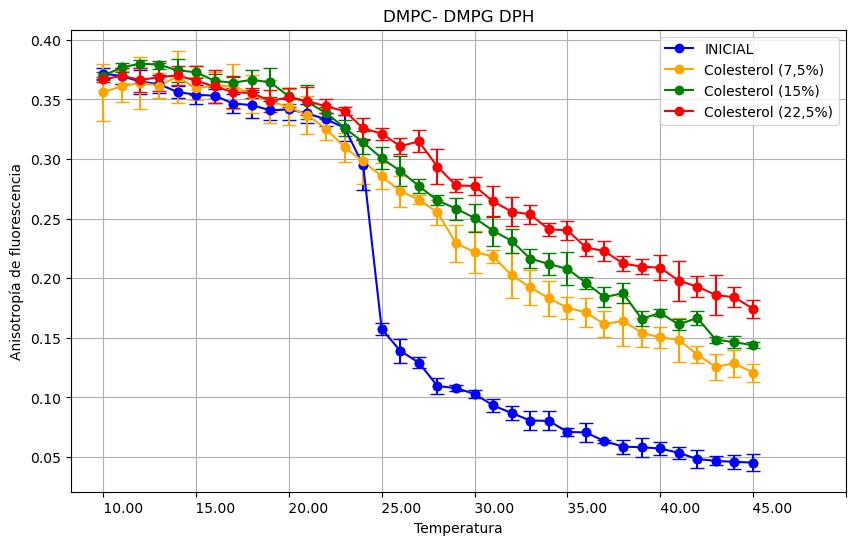

In [44]:
graficar_promedio_y_desviacion_DPH(temperatures_promedio,Promedio_DPHc, Desviacion_DPHc, Promedio_DPHc7, Desviacion_DPHc7,Promedio_DPHc15, Desviacion_DPHc15,Promedio_DPHc22, Desviacion_DPHc22)

In [46]:
def graficar_derivadas(temperatures_promedio, Promedio_DPH, Promedio_DPH7, Promedio_DPH15,Promedio_DPH22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x,y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-1):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_DPH)
    der_p = derivada(T, Promedio_DPH7)
    der_p15 = derivada(T, Promedio_DPH15)
    der_p22 = derivada(T, Promedio_DPH22)

    
    plt.plot(T[:-1], der_promedio, label='INICIAL')
    plt.plot(T[:-1], der_p, label='Colesterol(7,5%)')
    plt.plot(T[:-1], der_p15, label='Colesterol(15%)')
    plt.plot(T[:-1], der_p22, label='Colesterol(22,5%)')


    plt.xlabel('Temperatura (°C)')
    plt.ylabel('Derivada de Anisotropía')
    plt.title('DMPC- DMPG DPH')
    plt.xticks(range(10, 45, 5))  
    plt.grid(True)
    plt.legend()

    plt.show()

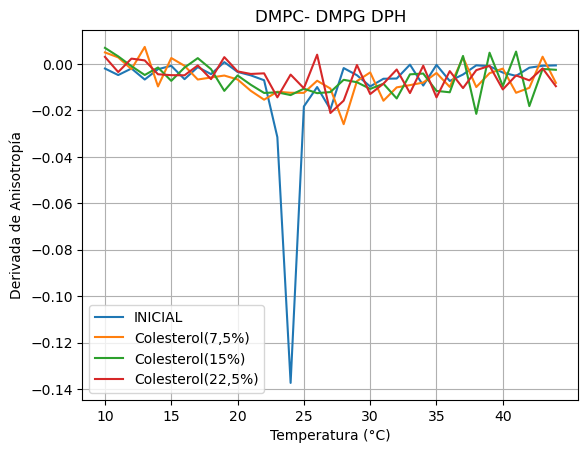

In [47]:
graficar_derivadas(temperatures_promedio, Promedio_DPHc, Promedio_DPHc7,Promedio_DPHc15,Promedio_DPHc22)

In [57]:
def encontrar_temperatura_minimacc(temperatures_promedio, Promedio_Laurdan, Promedio_Laurdan7, Promedio_Laurdan15, Promedio_Laurdan22):
    T = [float(temperatures_promedio[i]) for i in range(len(temperatures_promedio))]
    
    def derivada(x, y):
        h = x[1] - x[0]
        derivada = []

        for i in range(len(y)-23):
            derivada.append((y[i+1] - y[i]) / h)

        return derivada

    der_promedio = derivada(T, Promedio_Laurdan)
    der_p = derivada(T, Promedio_Laurdan7)
    der_p15 = derivada(T, Promedio_Laurdan15)
    der_p22 = derivada(T, Promedio_Laurdan22)

    
    T_min = np.argmin(der_promedio)
    T_min = T[T_min]

    T_min7l = np.argmin(der_p)
    T_min7l = T[T_min7l]
    
    T_min15l = np.argmin(der_p15)
    T_min15l = T[T_min15l]
    
    T_min22l = np.argmin(der_p22)
    T_min22l = T[T_min22l]

    return T_min, T_min7l, T_min15l, T_min22l

In [58]:
T_min, T_min7l, T_m15, T_m22 = encontrar_temperatura_minimacc(temperatures_promedio, Promedio_DPHc, Promedio_DPHc7,Promedio_DPHc15,Promedio_DPHc22)

In [59]:
T_min, T_min7l, T_m15, T_m22

(22.0, 22.0, 22.0, 18.0)